# Setup and load data

In [2]:
# Install dependencies
import tensorflow as tf
import os

In [38]:
#  Avoid OOM errors
gpus = tf.config.experimental.list_logical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [39]:
# Remove doddy images
import cv2
import imghdr

In [40]:
data_dir = "Images"
image_exts = ['jpeg', 'jpg', 'png', 'bmp', 'svg']

In [41]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path  = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print("Image not part of extension list {}".format(image_path))
                os.remove(image_path)
        except Exception as e:
            print("Issue with image {}".format(image_path))

Image not part of extension list Images\number_seven\192px.svg


In [46]:
#  Load Data
import numpy as np
from matplotlib import pyplot as plt

In [13]:
# size of image to train
IMG_SIZE = 256

In [23]:
# storring labels 
X_TRAIN = []
Y_TRAIN = []

In [9]:
# list of all cartegories
LABELS = []
for category in os.listdir(data_dir):
    LABELS.append(category)

In [26]:
# labelling each picture

# encoding the labels
for category in os.listdir(data_dir):
    
    # creates path for each category
    path = os.path.join(data_dir, category)
    
    # encodes each category
    class_num = LABELS.index(category)
    
    for img in os.listdir(path):
        try:
            img_array = cv2.imread(os.path.join(path, img))
            new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
            X_TRAIN.append(new_array)
            Y_TRAIN.append(class_num)
        except Exception as e:
            pass

256

In [59]:
data = tf.keras.utils.image_dataset_from_directory(data_dir)

Found 348 files belonging to 3 classes.


In [43]:
data_iterator = data.as_numpy_iterator()

In [44]:
batch = data_iterator.next()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


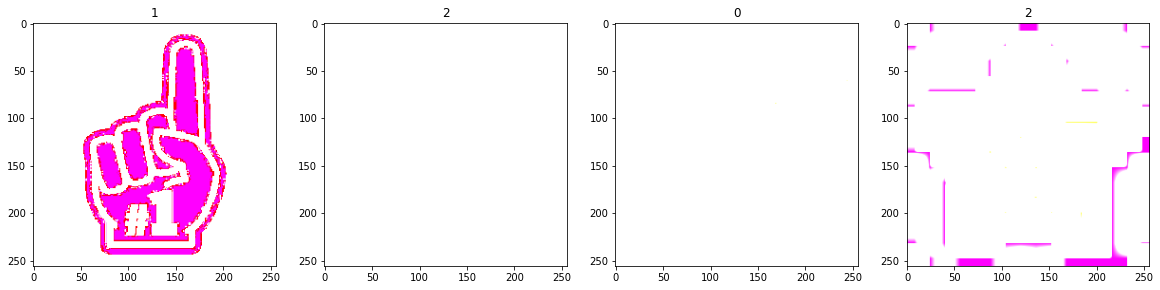

In [47]:
fig, ax = plt.subplots(ncols=4, figsize =(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])
    # imshow(img)

# Preprocessing

In [60]:
# scale data
data = data.map(lambda x,y: (x/255,y))

In [66]:
data.as_numpy_iterator().next()

(array([[[[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [0.998966  , 0.998966  , 0.998966  ],
          [0.963534  , 0.963534  , 0.963534  ],
          [0.8980392 , 0.8980392 , 0.8980392 ]],
 
         [[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [0.998966  , 0.998966  , 0.998966  ],
          [0.963534  , 0.963534  , 0.963534  ],
          [0.8980392 , 0.8980392 , 0.8980392 ]],
 
         [[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [0.998966  , 0.998966  , 0.998966  ],
          [0.963534  , 0.963534  , 0.963534  ],
          [0.8980392 , 0.8980392 , 0.8980392 ]],
 
         ...,
 
         [[0.91986823, 0.91986823, 0.91986823],
          [0.91986

In [67]:
#  split data
lengthData = len(data)
train_size = int(lengthData*.7)
val_size = int(lengthData*.2) + 1
test_size = int(lengthData*.1)+1

In [68]:
lengthData

11

In [70]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# Deep Learning

In [71]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [72]:
model = Sequential()
# list of possible architecture
# LeNet-5
# VGG16
# ResNet50

In [18]:
model.add(Conv2D(16, (3,3),1, activation="relu", input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation="relu"))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation="relu"))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation="relu"))
model.add(Dense(1, activation="sigmoid"))


In [19]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics = ['accuracy'])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [21]:
logdir = 'logs'

In [22]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir =logdir)

In [23]:
hist = model.fit(train, epochs=20, validation_data=val)

Epoch 1/20
2/2 [==============================] - 4s 2s/step - loss: 1.0436 - accuracy: 0.5625 - val_loss: 2.2663 - val_accuracy: 0.5312
Epoch 2/20
2/2 [==============================] - 3s 1s/step - loss: 1.5640 - accuracy: 0.5312 - val_loss: 0.7809 - val_accuracy: 0.4062
Epoch 3/20
2/2 [==============================] - 3s 1s/step - loss: 0.6622 - accuracy: 0.6094 - val_loss: 0.6890 - val_accuracy: 0.5625
Epoch 4/20
2/2 [==============================] - 2s 1s/step - loss: 0.6832 - accuracy: 0.5312 - val_loss: 0.6284 - val_accuracy: 0.5938
Epoch 5/20
2/2 [==============================] - 2s 1s/step - loss: 0.6592 - accuracy: 0.5938 - val_loss: 0.6223 - val_accuracy: 0.7188
Epoch 6/20
2/2 [==============================] - 3s 1s/step - loss: 0.6115 - accuracy: 0.6875 - val_loss: 0.5773 - val_accuracy: 0.7812
Epoch 7/20
2/2 [==============================] - 2s 1s/step - loss: 0.5506 - accuracy: 0.7188 - val_loss: 0.6744 - val_accuracy: 0.5312
Epoch 8/20
2/2 [=========================

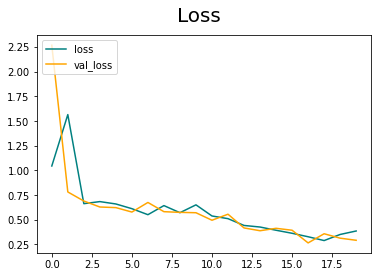

In [25]:
#  Plot performance
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc='upper left')

plt.show()

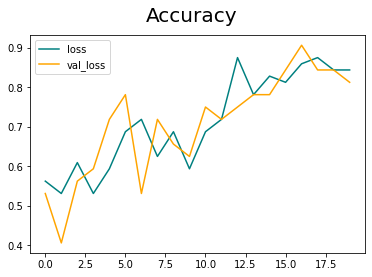

In [26]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='loss')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_loss')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc='upper left')

plt.show()

# Evaluate Performance

In [27]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [29]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [30]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 259ms/step


In [34]:
print("Precision: {}, Recall: {}, Accuracy: {},"
      .format(pre.result().numpy(), re.result().numpy(), acc.result().numpy()))

Precision: 1.0, Recall: 0.7692307829856873, Accuracy: 0.90625,


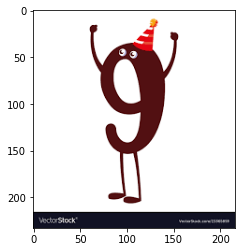

In [36]:
# Test
import cv2
img = cv2.imread('test_case.png')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

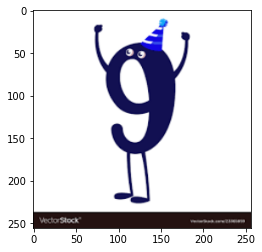

In [40]:
# fitting for the model
resize = tf.image.resize(img, (256, 256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [41]:
yhat = model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 72ms/step


In [42]:
yhat

array([[0.98036575]], dtype=float32)

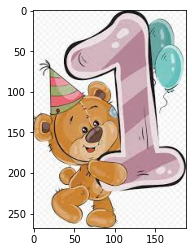

In [43]:
# 2nd test case
img = cv2.imread('test_case_2.jpeg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

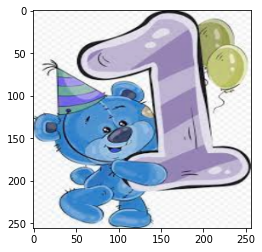

In [44]:
resize = tf.image.resize(img, (256, 256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [45]:
yhat = model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 30ms/step


In [55]:
yhat.item()

0.1816185712814331

# Save the model

In [56]:
from tensorflow.keras.models import load_model

In [57]:
model.save(os.path.join('models','nineOnemodel.h5'))

In [58]:
new_model = load_model(os.path.join('models', 'nineOnemodel.h5'))

In [59]:
yhatnew = new_model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 150ms/step


In [62]:
yhat.item()

0.1816185712814331

# Secoond Model

In [104]:
# number of categories
category = []

In [105]:
for cat in os.listdir(data_dir):
    category.append(cat)

In [109]:
from tensorflow.keras.applications import VGG16

In [147]:
model = Sequential()

In [148]:
# Load the VGG16 model without the top (fully connected) layers
vgg16_base = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


model.add(vgg16_base)
model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dense(4096, activation='relu'))
model.add(Dense(len(category), activation='softmax'))  

# Freeze the pre-trained layers
vgg16_base.trainable = False

In [149]:
model.compile(
    loss=tf.losses.SparseCategoricalCrossentropy (),
    optimizer= 'adam',
    metrics=['accuracy']
)

In [203]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_3 (Flatten)         (None, 25088)             0         
                                                                 
 dense_9 (Dense)             (None, 4096)              102764544 
                                                                 
 dense_10 (Dense)            (None, 4096)              16781312  
                                                                 
 dense_11 (Dense)            (None, 3)                 12291     
                                                                 
Total params: 134,272,835
Trainable params: 119,558,147
Non-trainable params: 14,714,688
_________________________________________________________________


In [121]:
# loading data
data = tf.keras.utils.image_dataset_from_directory(data_dir, image_size=(224, 224))

# tf.keras.utils.image_dataset_from_directory??

Found 348 files belonging to 3 classes.


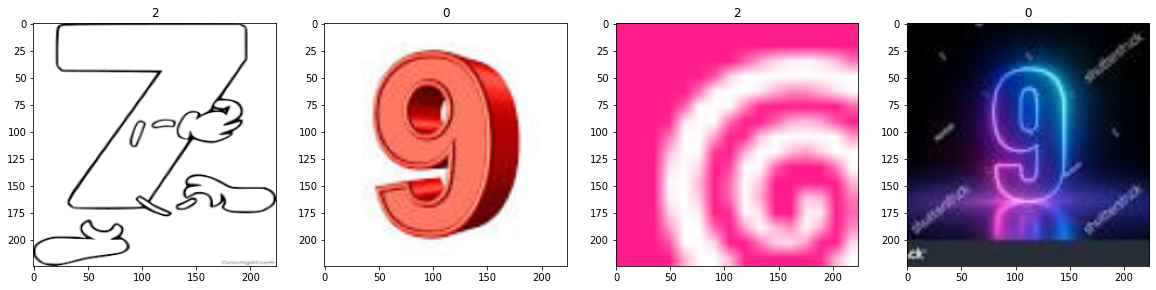

In [202]:
# visualizing data
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()

fig, ax = plt.subplots(ncols=4, figsize =(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])
    # imshow(img)

In [123]:
# scale data
data = data.map(lambda x,y: (x/255,y))

In [ ]:
# shufffle data
data.as_numpy_iterator().next()

In [125]:
# split data
lengthData = len(data)
train_size = int(lengthData*.7)
val_size = int(lengthData*.2) + 1
test_size = int(lengthData*.1)+1

In [126]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [150]:
# training model
hist = model.fit(train, epochs=7, validation_data=val)

Epoch 1/7
7/7 [==============================] - 53s 7s/step - loss: 18.0154 - accuracy: 0.4241 - val_loss: 1.0637 - val_accuracy: 0.7812
Epoch 2/7
7/7 [==============================] - 50s 8s/step - loss: 0.6768 - accuracy: 0.8036 - val_loss: 0.3535 - val_accuracy: 0.8958
Epoch 3/7
7/7 [==============================] - 51s 7s/step - loss: 0.2394 - accuracy: 0.9241 - val_loss: 0.0916 - val_accuracy: 0.9688
Epoch 4/7
7/7 [==============================] - 51s 8s/step - loss: 0.1146 - accuracy: 0.9643 - val_loss: 0.0653 - val_accuracy: 0.9896
Epoch 5/7
7/7 [==============================] - 70s 10s/step - loss: 0.0976 - accuracy: 0.9688 - val_loss: 0.0626 - val_accuracy: 0.9896
Epoch 6/7
7/7 [==============================] - 64s 10s/step - loss: 0.0493 - accuracy: 0.9866 - val_loss: 0.0428 - val_accuracy: 0.9896
Epoch 7/7
7/7 [==============================] - 64s 9s/step - loss: 0.0567 - accuracy: 0.9866 - val_loss: 0.0637 - val_accuracy: 0.9792


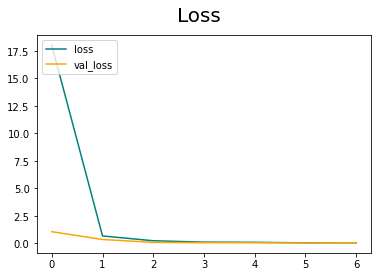

In [151]:
#  Plot performance
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc='upper left')

plt.show()

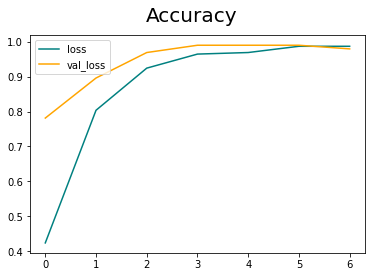

In [152]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='loss')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_loss')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc='upper left')

plt.show()

In [133]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [153]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

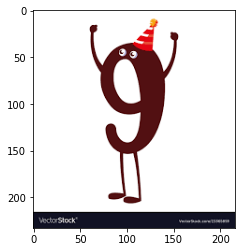

In [187]:
# Test
import cv2
img = cv2.imread('test_case.png')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

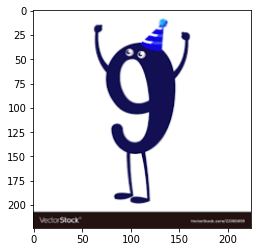

In [188]:
# fitting for the model
resize = tf.image.resize(img, (224, 224))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [189]:
yhat = model.predict(np.expand_dims(resize/255,0))


1/1 [==============================] - 0s 320ms/step


In [190]:
yhat

array([[3.6272141e-01, 6.3713115e-01, 1.4745044e-04]], dtype=float32)

In [191]:
# Get the index of the maximum value
predicted_index = np.argmax(yhat)

In [192]:
# Example label mapping
label_mapping = {0: 'nine', 1: 'one', 2: 'seven'}

In [193]:
# Get the predicted category
predicted_category = label_mapping[predicted_index]

In [194]:
print(predicted_category)

one


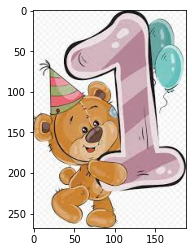

In [179]:
# 2nd test case
img = cv2.imread('test_case_2.jpeg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

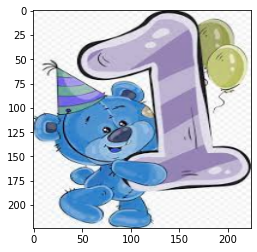

In [180]:
resize = tf.image.resize(img, (224, 224))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [181]:
yhat = model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 262ms/step


In [182]:
# Get the index of the maximum value
predicted_index = np.argmax(yhat)

In [183]:
# Example label mapping
label_mapping = {0: 'nine', 1: 'one', 2: 'seven'}

In [184]:
# Get the predicted category
predicted_category = label_mapping[predicted_index]

In [185]:
print(predicted_category)


one


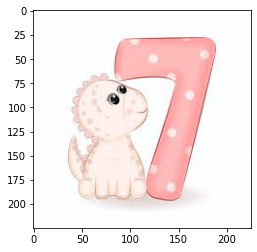

In [195]:
# 3rd test case
img = cv2.imread('test_case_3.jpeg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

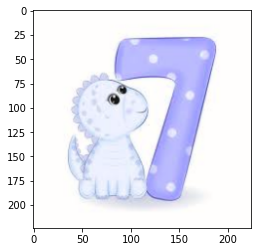

In [196]:
resize = tf.image.resize(img, (224, 224))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [197]:
yhat = model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 337ms/step


In [201]:
yhat

array([[0.36811525, 0.45344424, 0.1784405 ]], dtype=float32)

In [198]:
# Get the index of the maximum value
predicted_index = np.argmax(yhat)

In [199]:
# Get the predicted category
predicted_category = label_mapping[predicted_index]

In [200]:
print(predicted_category)


one
